In [41]:
from datasets import load_dataset
import IPython.display as ipd
import numpy as np
from whisper_finetune.data.utils import inverse_mel_to_audio

In [42]:
ds = load_dataset('i4ds/test_dataset_mp3_vs_wav', split='mp3')

In [43]:
example = ds[2]['audio']['array']

In [44]:
ds[2]['text']

'<|0.00|> Weniger Operationen bedeuten auch weniger Patienten in der Rehabilitation.<|5.52|><|6.16|> Die Muslime ihrerseits verhalten sich zu passiv.<|9.86|><|10.02|> Es war Fazit und Kritik zugleich.<|12.86|><|12.96|> Sie zogen mit 18 aus in ein US-College nach Minnesota.<|17.08|><|17.32|> Denn das schwächere Signal ist viel schwieriger zu identifizieren.<|20.24|><|20.24|> In die Trauer mischt sich Wut.<|22.28|><|22.84|> Das wäre ein Plus für beide.<|25.24|><|26.22|> Vergangene Woche wurden die Entwürfe vorgestellt.<|29.54|><|29.96|>'

In [45]:
ipd.Audio(example, rate=16000)

In [46]:
from whisper_finetune.data.utils import TimeWarpAugmenter, ExtremesFrequencyMasking
import torchaudio.transforms as T
from whisper.audio import log_mel_spectrogram
import matplotlib.pyplot as plt

In [47]:
from whisper.audio import CHUNK_LENGTH, N_FRAMES, N_SAMPLES, log_mel_spectrogram, pad_or_trim

In [72]:
example_mel = log_mel_spectrogram(example.astype(np.float32), n_mels =128)

In [49]:
example_mel.shape[1]

3000

In [50]:
pad_or_trim(example_mel, 3000).shape

torch.Size([128, 3000])

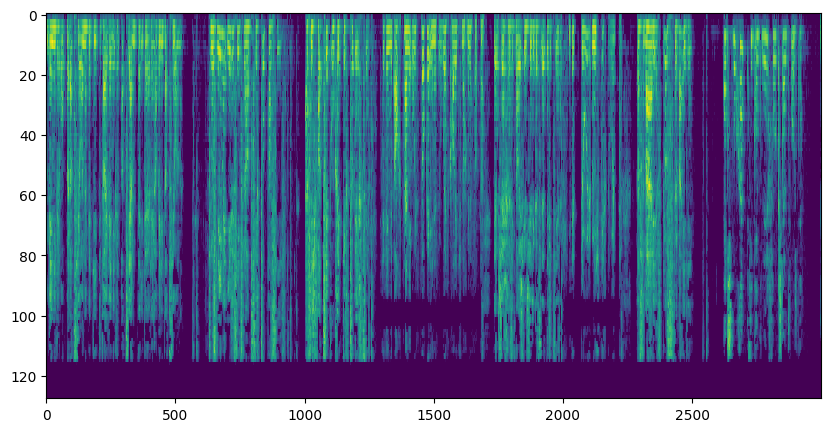

In [51]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [65]:
time_masking = T.TimeMasking(time_mask_param=100)
freq_masking = T.FrequencyMasking(freq_mask_param=27)
ex_masking = ExtremesFrequencyMasking(low_freq_range=10, high_freq_range=40)
time_warping = TimeWarpAugmenter(W=80)

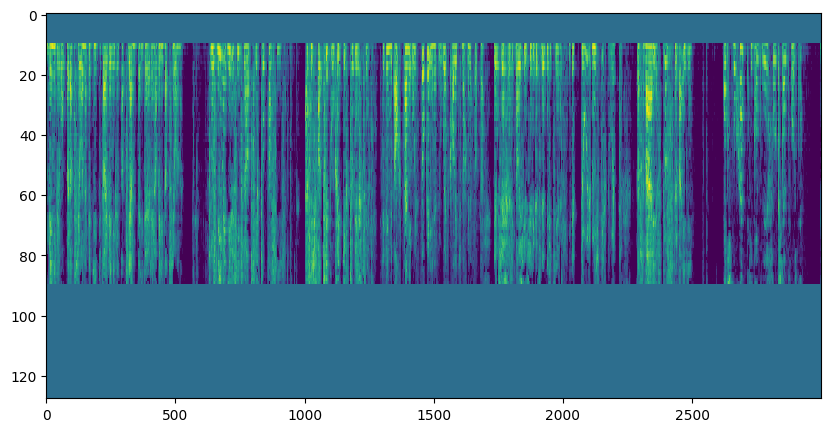

In [95]:
import matplotlib.pyplot as plt
y_ext = ex_masking(example_mel.clone())
# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(y_ext, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


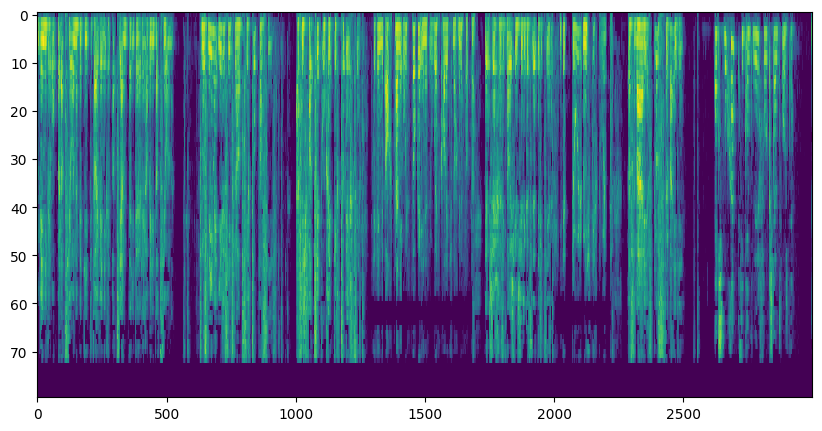

In [38]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [107]:
example_mel_t = time_warping(example_mel)

In [111]:
example_mel_t.min()

tensor(-0.6530)

In [108]:
# Set padding value for spectrogram
padding_value = np.log10(1e-10)  # This is -10 before normalization

# Normalize and apply padding
log_spec = (example_mel_t + 4.0) / 4.0

# If you need to pad, use the normalized value of padding_value
normalized_padding_value = (padding_value + 4.0) / 4.0

In [109]:
normalized_padding_value

-1.5

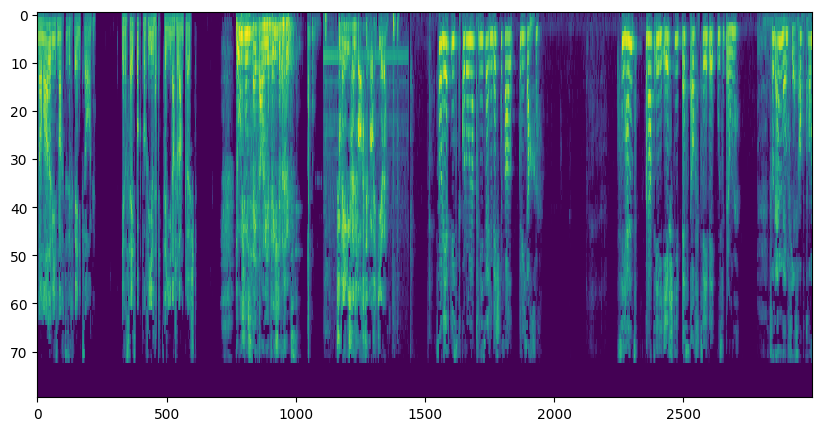

In [10]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel_t, aspect='auto', cmap='viridis', interpolation='nearest')
# Show the plot
plt.show()


In [104]:
example_mel_f = freq_masking(example_mel, mask_value=-0.5644)

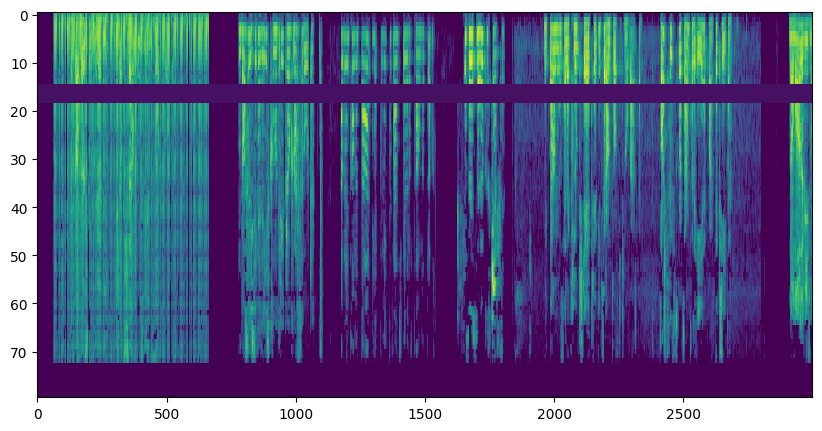

In [105]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel_f, aspect='auto', cmap='viridis', interpolation='nearest')
# Show the plot
plt.show()


In [11]:
inverse_example = inverse_mel_to_audio(example_mel_t)

In [12]:
ipd.Audio(inverse_example, rate=16000)